In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def grid_search(func, x, y, delta_x, delta_y, grid_size=5, num_iter=3):
    """Args:
      func(x, y) = (score, extra_results),
      where score is the scalar that we would like to maximize (e.g. ESS averaged over the chains)
      and extra_results are some additional info that we would like to store, e.g. acceptance rate

      The initial grid will be set on the region [x - delta_x, x + delta x] \times [y - delta_y, y + delta y].
      In each iteration the grid will be shifted to the best location found by the previous grid and it will be shrinked,
      such that the nearest neigbours of the previous grid become the edges of the new grid.

      If at any point, the best point is found at the edge of the grid a warning is printed.

    Returns:
      (x, y, score, extra results) at the best parameters
    """

    def kernel(state):
        z, delta_z = state

        # compute the func on the grid
        Z = np.linspace(z - delta_z, z + delta_z, grid_size)
        # print(Z.shape)
        # raise Exception
        # jax.debug.print("grid {x}", x=Z)
        Results = [[func(xx, yy) for yy in Z[:, 1]] for xx in Z[:, 0]]
        Scores = [
            [Results[i][j][0] for j in range(grid_size)] for i in range(grid_size)
        ]
        # sns.heatmap(Scores)
        # print(np.reshape(Scores, (grid_size, grid_size)))

        # grid = (np.reshape(([[(xx, yy) for yy in Z[:, 1]] for xx in Z[:, 0]]), (grid_size, grid_size, 2)))

        # print(grid[:,:,0])
        # print(grid[:,:,1])
        # return (None, None, None)

        
        
        # jax.lax.fori_loop(0, len(Results), lambda)
        # jax.debug.print("{x}",x="Outcomes from grid")
        # for i,f in enumerate(Scores):
        #     for j, g in enumerate(f):

                # jax.debug.print("{x}", x=(Scores[i][j].item(), grid[i][j][0].item(), grid[i][j][1].item()))

        # find the best point on the grid
        ind = np.unravel_index(np.argmax(Scores, axis=None), (grid_size, grid_size))

        if np.any(np.isin(np.array(ind), [0, grid_size - 1])):
            print("Best parameters found at the edge of the grid.")

        # new grid
        state = (
            np.array([Z[ind[i], i] for i in range(2)]),
            2 * delta_z / (grid_size - 1),
        )
        # print("Results", Results[ind[0]][ind[1]])
        print("new state", state[0])
        # print("Scores", np.reshape(Scores, (grid_size, grid_size) ))
        print("Results", [[(xx, yy, func(xx, yy)[0]) for yy in Z[:, 1]] for xx in Z[:, 0]])

        sns.heatmap(np.array(Scores).T, annot=True, xticklabels=Z[:, 0], yticklabels=Z[:, 1])
        plt.show()
        # return ()
        
        return (
            state,
            Results[ind[0]][ind[1]],
            np.any(np.isin(np.array(ind), [0, grid_size - 1])),
        )

    state = (np.array([x, y]), np.array([delta_x, delta_y]))

    initial_edge = False
    for iteration in range(num_iter):  # iteratively shrink and shift the grid
        state, results, edge = kernel(state)
        print("optimal result on iteration", iteration, results[0])
        # print("optimal index on iteration", iteration, state[0])
        # jax.debug.print("Optimal params on iteration: {x}", x=(results[1]))
        # jax.debug.print("Optimal score on iteration: {x}", x=(results[0]))
        if edge and iteration == 0:
            initial_edge = True


    # print("state shape", state[0].shape)
    return [state[0][0], state[0][1], *results], initial_edge

Best parameters found at the edge of the grid.
new state [ 1. 10.]
Results [[(-1.0, -10.0, -21.0), (-1.0, -5.0, -11.0), (-1.0, 0.0, -1.0), (-1.0, 5.0, 9.0), (-1.0, 10.0, 19.0)], [(-0.5, -10.0, -20.5), (-0.5, -5.0, -10.5), (-0.5, 0.0, -0.5), (-0.5, 5.0, 9.5), (-0.5, 10.0, 19.5)], [(0.0, -10.0, -20.0), (0.0, -5.0, -10.0), (0.0, 0.0, 0.0), (0.0, 5.0, 10.0), (0.0, 10.0, 20.0)], [(0.5, -10.0, -19.5), (0.5, -5.0, -9.5), (0.5, 0.0, 0.5), (0.5, 5.0, 10.5), (0.5, 10.0, 20.5)], [(1.0, -10.0, -19.0), (1.0, -5.0, -9.0), (1.0, 0.0, 1.0), (1.0, 5.0, 11.0), (1.0, 10.0, 21.0)]]


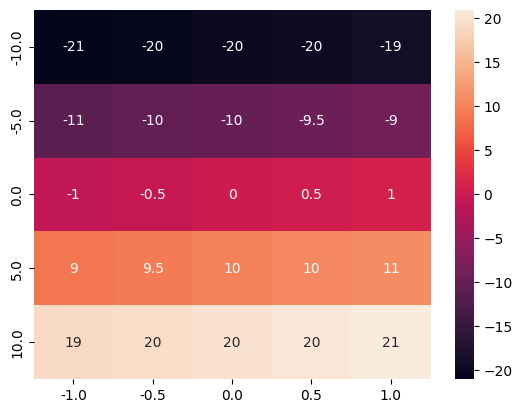

optimal result on iteration 0 21.0
Best parameters found at the edge of the grid.
new state [ 1.5 15. ]
Results [[(0.5, 5.0, 10.5), (0.5, 7.5, 15.5), (0.5, 10.0, 20.5), (0.5, 12.5, 25.5), (0.5, 15.0, 30.5)], [(0.75, 5.0, 10.75), (0.75, 7.5, 15.75), (0.75, 10.0, 20.75), (0.75, 12.5, 25.75), (0.75, 15.0, 30.75)], [(1.0, 5.0, 11.0), (1.0, 7.5, 16.0), (1.0, 10.0, 21.0), (1.0, 12.5, 26.0), (1.0, 15.0, 31.0)], [(1.25, 5.0, 11.25), (1.25, 7.5, 16.25), (1.25, 10.0, 21.25), (1.25, 12.5, 26.25), (1.25, 15.0, 31.25)], [(1.5, 5.0, 11.5), (1.5, 7.5, 16.5), (1.5, 10.0, 21.5), (1.5, 12.5, 26.5), (1.5, 15.0, 31.5)]]


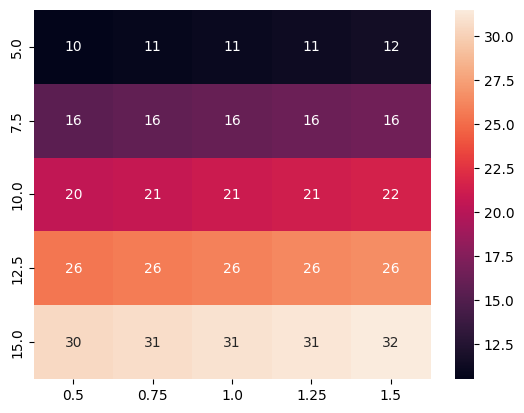

optimal result on iteration 1 31.5
Best parameters found at the edge of the grid.
new state [ 1.75 17.5 ]
Results [[(1.25, 12.5, 26.25), (1.25, 13.75, 28.75), (1.25, 15.0, 31.25), (1.25, 16.25, 33.75), (1.25, 17.5, 36.25)], [(1.375, 12.5, 26.375), (1.375, 13.75, 28.875), (1.375, 15.0, 31.375), (1.375, 16.25, 33.875), (1.375, 17.5, 36.375)], [(1.5, 12.5, 26.5), (1.5, 13.75, 29.0), (1.5, 15.0, 31.5), (1.5, 16.25, 34.0), (1.5, 17.5, 36.5)], [(1.625, 12.5, 26.625), (1.625, 13.75, 29.125), (1.625, 15.0, 31.625), (1.625, 16.25, 34.125), (1.625, 17.5, 36.625)], [(1.75, 12.5, 26.75), (1.75, 13.75, 29.25), (1.75, 15.0, 31.75), (1.75, 16.25, 34.25), (1.75, 17.5, 36.75)]]


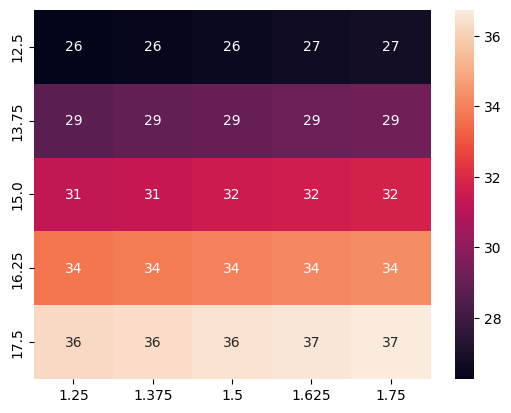

optimal result on iteration 2 36.75


In [2]:
results, hit_edge = grid_search(func=lambda x, y:(x+2*y, 0), x=0, y=0, delta_x=1, delta_y=10, grid_size=5, num_iter=3)

In [3]:
import sys

sys.path.append("./")
sys.path.append("../")

from blackjax.diagnostics import effective_sample_size
from collections import defaultdict
from functools import partial
import math
import operator
import os
import pprint
from statistics import mean, median
import jax
import jax.numpy as jnp
import pandas as pd
import scipy
from jax.flatten_util import ravel_pytree


from blackjax.adaptation.mclmc_adaptation import MCLMCAdaptationState
from blackjax.adaptation.adjusted_mclmc_adaptation import adjusted_mclmc_make_L_step_size_adaptation

# os.environ["XLA_FLAGS"] = "--xla_force_host_platform_device_count=" + str(128)
# num_cores = jax.local_device_count()
# print(num_cores, jax.lib.xla_bridge.get_backend().platform)

import itertools

import numpy as np
from blackjax.mcmc.adjusted_mclmc import rescale

import blackjax
from benchmarks.sampling_algorithms import (
    adjusted_mclmc_tuning,
    calls_per_integrator_step,
    integrator_order,
    map_integrator_type_to_integrator,
    run_adjusted_mclmc,
    run_adjusted_mclmc_no_tuning,
    run_nuts,
    run_unadjusted_mclmc_no_tuning,
    target_acceptance_rate_of_order,
    run_unadjusted_mclmc,
    unadjusted_mclmc_tuning,
)

# run_adjusted_mclmc, run_nuts, samplers
from benchmarks.inference_models import (
    Banana,
    Brownian,
    Funnel,
    GermanCredit,
    IllConditionedGaussian,
    ItemResponseTheory,
    MixedLogit,
    StandardNormal,
    StochasticVolatility,
)
from blackjax.mcmc.integrators import (
    generate_euclidean_integrator,
    generate_isokinetic_integrator,
    isokinetic_mclachlan,
    mclachlan_coefficients,
    omelyan_coefficients,
    velocity_verlet,
    velocity_verlet_coefficients,
    yoshida_coefficients,
)
from blackjax.util import run_inference_algorithm, store_only_expectation_values



info 0.9224326610565186
Best parameters found at the edge of the grid.
new state [2.1618714  0.19999999]
Results [[(0.20000005, 0.19999999, Array(0., dtype=float32)), (0.20000005, 0.42847103, Array(0., dtype=float32)), (0.20000005, 0.65694207, Array(0., dtype=float32)), (0.20000005, 0.8854131, Array(0., dtype=float32)), (0.20000005, 1.1138842, Array(0., dtype=float32)), (0.20000005, 1.3423553, Array(0., dtype=float32)), (0.20000005, 1.5708263, Array(0., dtype=float32))], [(0.5923743, 0.19999999, Array(0., dtype=float32)), (0.5923743, 0.42847103, Array(0., dtype=float32)), (0.5923743, 0.65694207, Array(0., dtype=float32)), (0.5923743, 0.8854131, Array(0., dtype=float32)), (0.5923743, 1.1138842, Array(0., dtype=float32)), (0.5923743, 1.3423553, Array(0., dtype=float32)), (0.5923743, 1.5708263, Array(0., dtype=float32))], [(0.98474854, 0.19999999, Array(0., dtype=float32)), (0.98474854, 0.42847103, Array(0., dtype=float32)), (0.98474854, 0.65694207, Array(0., dtype=float32)), (0.98474854,

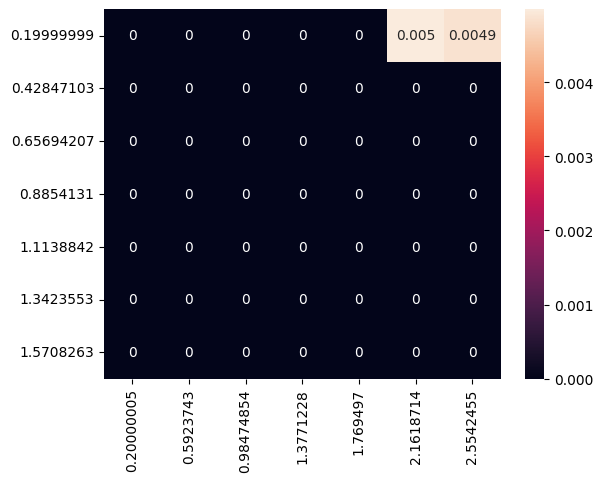

optimal result on iteration 0 0.004984506
new state [2.03108  0.352314]
Results [[(1.7694972, -0.028471068, Array(0., dtype=float32)), (1.7694972, 0.047685944, Array(0., dtype=float32)), (1.7694972, 0.123842955, Array(0., dtype=float32)), (1.7694972, 0.19999997, Array(0., dtype=float32)), (1.7694972, 0.27615696, Array(0.00784247, dtype=float32)), (1.7694972, 0.352314, Array(0., dtype=float32)), (1.7694972, 0.42847103, Array(0., dtype=float32))], [(1.9002886, -0.028471068, Array(0., dtype=float32)), (1.9002886, 0.047685944, Array(0., dtype=float32)), (1.9002886, 0.123842955, Array(0., dtype=float32)), (1.9002886, 0.19999997, Array(0.00554516, dtype=float32)), (1.9002886, 0.27615696, Array(0., dtype=float32)), (1.9002886, 0.352314, Array(0., dtype=float32)), (1.9002886, 0.42847103, Array(0., dtype=float32))], [(2.03108, -0.028471068, Array(0., dtype=float32)), (2.03108, 0.047685944, Array(0.00119421, dtype=float32)), (2.03108, 0.123842955, Array(0.00318236, dtype=float32)), (2.03108, 0.1

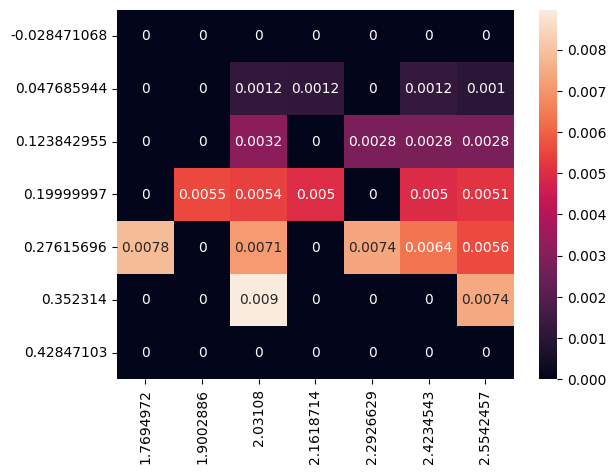

optimal result on iteration 1 0.008969048
Best parameters found at the edge of the grid.
new state [2.1618714  0.40308535]
Results [[(1.9002886, 0.27615696, Array(0., dtype=float32)), (1.9002886, 0.30154264, Array(0., dtype=float32)), (1.9002886, 0.32692832, Array(0.00891406, dtype=float32)), (1.9002886, 0.352314, Array(0., dtype=float32)), (1.9002886, 0.37769967, Array(0., dtype=float32)), (1.9002886, 0.40308535, Array(0., dtype=float32)), (1.9002886, 0.42847103, Array(0., dtype=float32))], [(1.9438857, 0.27615696, Array(0., dtype=float32)), (1.9438857, 0.30154264, Array(0., dtype=float32)), (1.9438857, 0.32692832, Array(0.00864249, dtype=float32)), (1.9438857, 0.352314, Array(0., dtype=float32)), (1.9438857, 0.37769967, Array(0., dtype=float32)), (1.9438857, 0.40308535, Array(0., dtype=float32)), (1.9438857, 0.42847103, Array(0., dtype=float32))], [(1.9874829, 0.27615696, Array(0., dtype=float32)), (1.9874829, 0.30154264, Array(0., dtype=float32)), (1.9874829, 0.32692832, Array(0., d

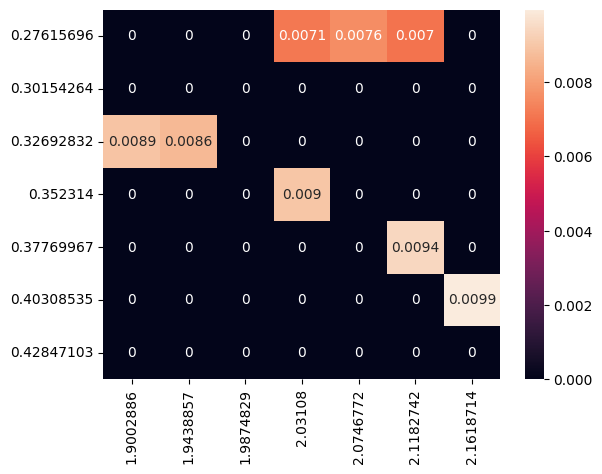

optimal result on iteration 2 0.009949416
new state [2.1618714  0.40308535]
Results [[(2.1182742, 0.37769967, Array(0.00941422, dtype=float32)), (2.1182742, 0.38616157, Array(0., dtype=float32)), (2.1182742, 0.39462346, Array(0., dtype=float32)), (2.1182742, 0.40308535, Array(0., dtype=float32)), (2.1182742, 0.41154724, Array(0., dtype=float32)), (2.1182742, 0.42000914, Array(0., dtype=float32)), (2.1182742, 0.42847103, Array(0., dtype=float32))], [(2.1328065, 0.37769967, Array(0.00893494, dtype=float32)), (2.1328065, 0.38616157, Array(0., dtype=float32)), (2.1328065, 0.39462346, Array(0., dtype=float32)), (2.1328065, 0.40308535, Array(0., dtype=float32)), (2.1328065, 0.41154724, Array(0., dtype=float32)), (2.1328065, 0.42000914, Array(0., dtype=float32)), (2.1328065, 0.42847103, Array(0., dtype=float32))], [(2.147339, 0.37769967, Array(0., dtype=float32)), (2.147339, 0.38616157, Array(0., dtype=float32)), (2.147339, 0.39462346, Array(0.0095417, dtype=float32)), (2.147339, 0.40308535, 

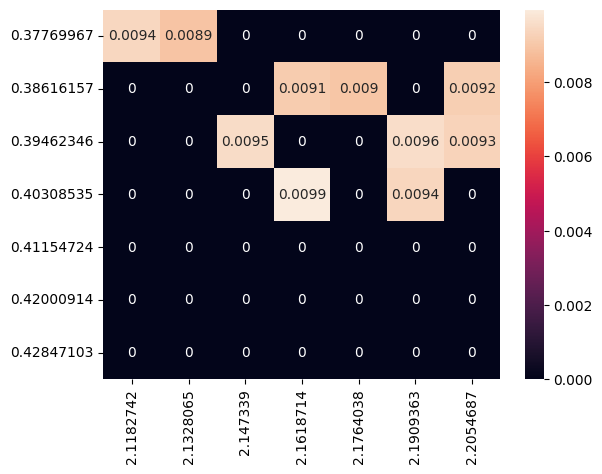

optimal result on iteration 3 0.009949416
new state [2.1618714  0.40308535]
Results [[(2.147339, 0.39462346, Array(0.0095417, dtype=float32)), (2.147339, 0.3974441, Array(0., dtype=float32)), (2.147339, 0.4002647, Array(0., dtype=float32)), (2.147339, 0.40308535, Array(0., dtype=float32)), (2.147339, 0.405906, Array(0., dtype=float32)), (2.147339, 0.4087266, Array(0., dtype=float32)), (2.147339, 0.41154724, Array(0., dtype=float32))], [(2.1521833, 0.39462346, Array(0., dtype=float32)), (2.1521833, 0.3974441, Array(0.0094995, dtype=float32)), (2.1521833, 0.4002647, Array(0., dtype=float32)), (2.1521833, 0.40308535, Array(0., dtype=float32)), (2.1521833, 0.405906, Array(0., dtype=float32)), (2.1521833, 0.4087266, Array(0., dtype=float32)), (2.1521833, 0.41154724, Array(0., dtype=float32))], [(2.1570272, 0.39462346, Array(0., dtype=float32)), (2.1570272, 0.3974441, Array(0.00973866, dtype=float32)), (2.1570272, 0.4002647, Array(0., dtype=float32)), (2.1570272, 0.40308535, Array(0.00948583

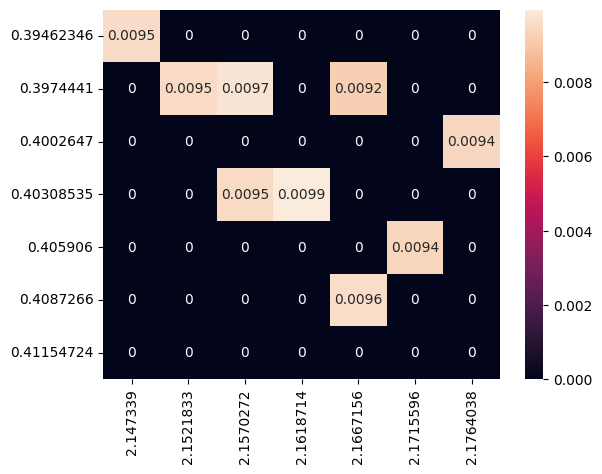

optimal result on iteration 4 0.009949416
new state [2.1634862  0.40308535]


In [5]:
from benchmarks.benchmark import benchmark_chains


model = Brownian()
integrator_type = "mclachlan"
num_steps = 20000
num_chains = 128
key1 = jax.random.PRNGKey(1)

batch_size = 128

init_key, state_key, run_key = jax.random.split(key1, 3)
initial_position = model.sample_init(init_key)
unadjusted_initial_state = blackjax.mcmc.mclmc.init(
    position=initial_position, logdensity_fn=model.logdensity_fn, rng_key=state_key
)
adjusted_initial_state = blackjax.mcmc.adjusted_mclmc.init(
    position=initial_position,
    logdensity_fn=model.logdensity_fn,
    random_generator_arg=state_key,
)

    


grid_key, bench_key, tune_key, init_key = jax.random.split(key1, 4)

initial_position = model.sample_init(init_key)

(
    blackjax_state_after_tuning,
    blackjax_adjusted_mclmc_sampler_params,
) = adjusted_mclmc_tuning(
    initial_position=initial_position,
    num_steps=num_steps,
    rng_key=tune_key,
    logdensity_fn=model.logdensity_fn,
    integrator_type=integrator_type,
    frac_tune3=0.0,
    target_acc_rate=0.9,
    diagonal_preconditioning=False,
)

def func(L, step_size):
        

        ess, ess_avg, ess_corr, params, acceptance_rate  = benchmark_chains(
            model=model,
            sampler=run_adjusted_mclmc_no_tuning(
                integrator_type=integrator_type,
                initial_state=blackjax_state_after_tuning,
                sqrt_diag_cov=1.,
                L=L,
                step_size=step_size,
                L_proposal_factor=jnp.inf,
            ),
            key=grid_key,
            n=num_steps,
            batch=batch_size,
        )


        return ess, (params.L, params.step_size)


out, edge = grid_search(
                func=func,
                x=blackjax_adjusted_mclmc_sampler_params.L*2,
                y=blackjax_adjusted_mclmc_sampler_params.step_size*2,
                # x=3.316967,
                # y=0.390205,
                delta_x=blackjax_adjusted_mclmc_sampler_params.L*2 - 0.2,
                delta_y=blackjax_adjusted_mclmc_sampler_params.step_size*2 - 0.2,
                grid_size=7,
                num_iter=5,
            )

ess, ess_avg, ess_corr, params, acceptance_rate = benchmark_chains(
                model,
                run_adjusted_mclmc_no_tuning(
                    integrator_type=integrator_type,
                    step_size=out[1],
                    L=out[0],
                    sqrt_diag_cov=1.0,
                    initial_state=blackjax_state_after_tuning,
                    return_ess_corr=False,
                ),
                bench_key,
                n=num_steps,
                batch=num_chains,
            )

